In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
# Normalize pixel values (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
# One-hot encode target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
model = Sequential([
    Flatten(input_shape=(28,28)),       # Flatten image (28x28 → 784 neurons)
    Dense(256, activation='relu'),      # Hidden layer 1
    Dropout(0.3),                       # Prevent overfitting
    BatchNormalization(),
    Dense(128, activation='relu'),      # Hidden layer 2
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),      # Hidden layer 2
    Dropout(0.1),
    BatchNormalization(),
    Dense(10, activation='softmax')     # Output layer (10 classes)
])

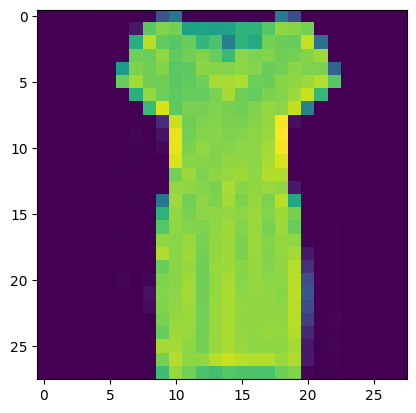

In [35]:
plt.imshow(x_train[20])

In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=40,
                    batch_size=128)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7127 - loss: 0.8477 - val_accuracy: 0.8245 - val_loss: 0.4776
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8289 - loss: 0.4729 - val_accuracy: 0.8463 - val_loss: 0.4245
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8412 - loss: 0.4382 - val_accuracy: 0.8547 - val_loss: 0.4037
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8464 - loss: 0.4179 - val_accuracy: 0.8561 - val_loss: 0.3963
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8572 - loss: 0.3947 - val_accuracy: 0.8506 - val_loss: 0.4190
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8563 - loss: 0.3953 - val_accuracy: 0.8599 - val_loss: 0.3835
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8615 - loss: 0.3827 - val_accuracy: 0.8625 - val_loss: 0.3751
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8640 - loss: 0.3760 - val_accuracy: 

In [57]:
# 5. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")

✅ Test Accuracy: 0.8863


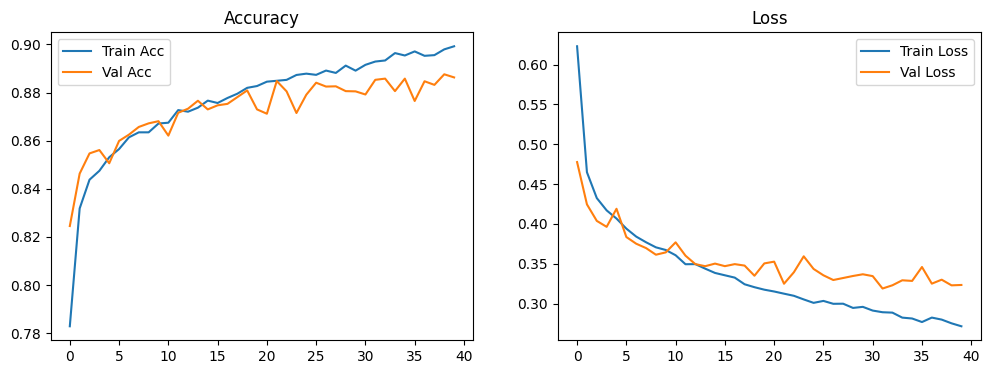

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")

plt.show()